In [2]:
import pandas as pd
subs=pd.read_csv('./COVID19positive_submissions.csv', low_memory=False)
coms=pd.read_csv('./COVID19positive_comments.csv', low_memory=False)

In [3]:
from datetime import datetime, timedelta
subs_set=subs.copy()
subs_set=subs_set[['id', 'created_utc']]
subs_set['created_at']=subs_set['created_utc'].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
coms_set=coms.copy()
coms_set=coms_set[['link_id', 'created_utc']]
coms_set['created_at']=coms_set['created_utc'].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

In [4]:
d={}
subs_d=subs_set['created_at'].value_counts().to_dict()
coms_d=coms_set['created_at'].value_counts().to_dict()
d=subs_d.copy()
for i in coms_d.keys():
    if i in d.keys():
        d[i]+=coms_d[i]
    else:
        d[i]=coms_d[i]

In [5]:
d = dict(sorted(d.items(), key = lambda x:datetime.strptime(x[0], '%Y-%m-%d')))
subs_d = dict(sorted(subs_d.items(), key = lambda x:datetime.strptime(x[0], '%Y-%m-%d')))

In [6]:
def scale(lst):
    min_val = min(lst)
    max_val = max(lst)
    scaled_lst = [(val - min_val) / (max_val - min_val) for val in lst]
    return scaled_lst

In [7]:
df=pd.read_csv('owid-covid-data.csv')
df=df[df['new_cases'].notna()]
kys=df['date'].unique()
vls=df.groupby('date')['new_cases'].sum()
vls=scale(vls)
# keys=keys[200:]
# vals=vals[200:]

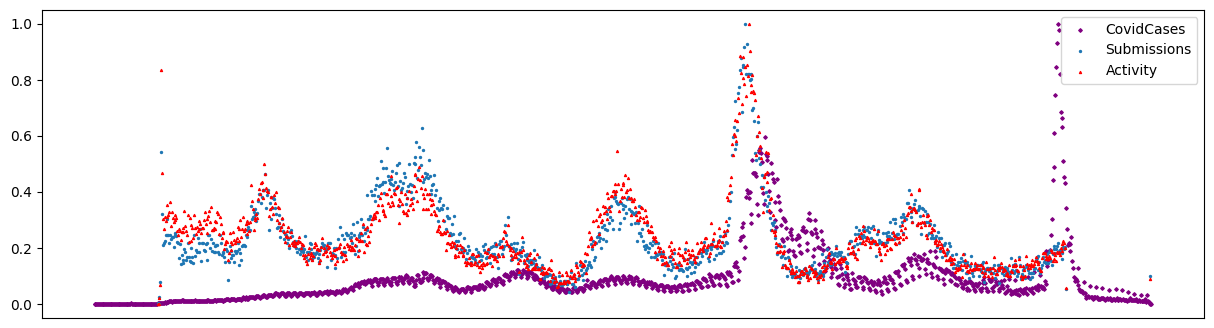

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
keys=d.keys()
vals=d.values()
vals=scale(vals)
keys_subs=subs_d.keys()
vals_subs=subs_d.values()
vals_subs=scale(vals_subs)
plt.scatter(kys, vls, marker='D', s=3,c='purple', label='CovidCases')
plt.scatter(keys_subs, vals_subs, s=2,label='Submissions')
plt.scatter(keys, vals, marker='^', c='r', s=2,label='Activity')
plt.legend()
plt.xticks([])
plt.show()

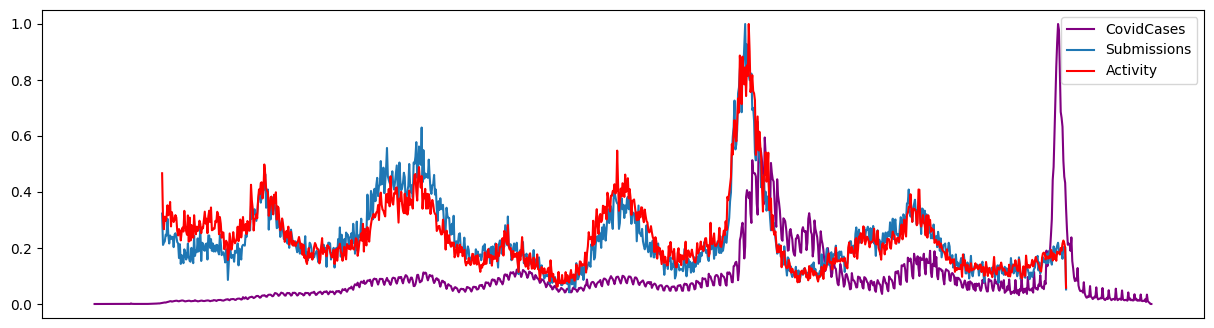

In [9]:
plt.figure(figsize=(15, 4))
keys=d.keys()
vals=d.values()
vals=scale(vals)
keys_subs=subs_d.keys()
vals_subs=subs_d.values()
vals_subs=scale(vals_subs)

t=6
keys=list(keys)[t:]
vals=vals[t:]
keys_subs=list(keys_subs)[t:]
vals_subs=vals_subs[t:]

plt.plot(kys, vls, color='purple', label='CovidCases')
plt.plot(keys_subs, vals_subs, label='Submissions')
plt.plot(keys, vals, color='red', label='Activity')
plt.legend()
plt.xticks([])
plt.show()

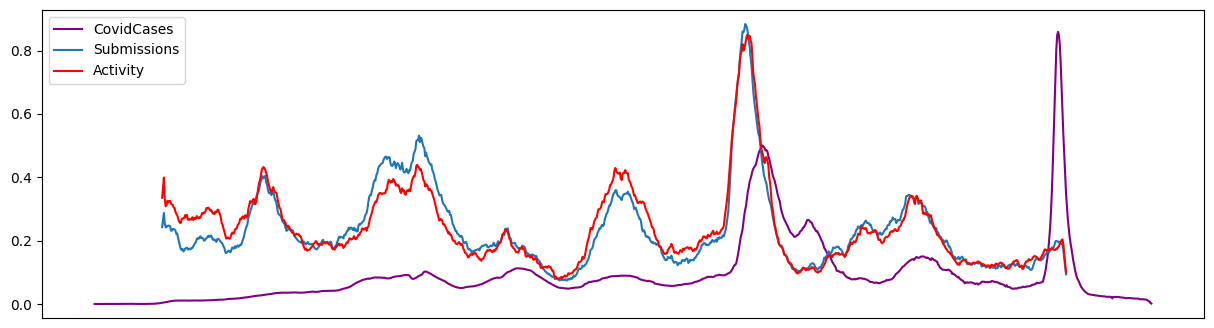

In [10]:
import numpy as np

window_size = 7

plt.figure(figsize=(15, 4))
keys=d.keys()
vals=d.values()
vals=scale(vals)
vals=np.convolve(vals, np.ones(window_size)/window_size, mode='same')
keys_subs=subs_d.keys()
vals_subs=subs_d.values()
vals_subs=scale(vals_subs)
vals_subs=np.convolve(vals_subs, np.ones(window_size)/window_size, mode='same')

vls=np.convolve(vls, np.ones(window_size)/window_size, mode='same')

t=6
keys=list(keys)[t:]
vals=vals[t:]
keys_subs=list(keys_subs)[t:]
vals_subs=vals_subs[t:]

plt.plot(kys, vls, color='purple', label='CovidCases')
plt.plot(keys_subs, vals_subs, label='Submissions')
plt.plot(keys, vals, color='red', label='Activity')
plt.legend()
plt.xticks([])
plt.show()